# Model Building Using Linear Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
import seaborn as sns

In [3]:
df=pd.read_csv('D:\FP\AQI\Data\Real-Data\Real_combine.csv')

In [4]:
df


,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,18.7,23.8,11.3,1017.5,58.0,1.8,3.1,5.4,223.208333
1,17.9,22.6,10.2,1014.3,46.0,1.9,5.9,11.1,200.645833
2,16.7,22.1,9.8,1014.6,80.0,1.8,0.9,3.5,285.225000
3,16.4,20.2,12.2,1016.2,80.0,1.1,0.9,3.5,236.825000
4,13.0,19.9,9.1,1016.9,79.0,1.8,3.5,3.5,276.908333
...,...,...,...,...,...,...,...,...,...
931,13.9,18.7,8.6,1016.2,78.0,1.8,2.8,3.5,310.250000
932,13.2,18.3,8.4,1015.3,82.0,1.8,1.9,3.5,375.791667
933,10.9,14.0,7.0,1019.3,86.0,1.0,2.2,5.4,223.250000
934,12.6,15.7,7.4,1017.8,80.0,1.0,2.2,3.5,248.958333


In [5]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

<AxesSubplot:>

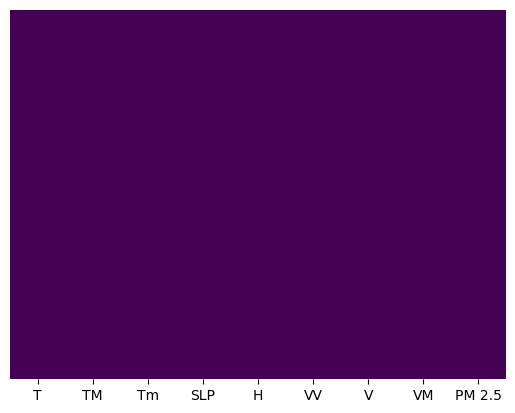

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
#dependent features x
x=df.iloc[:,:-1]
#independent feature Y
y=df.iloc[:,-1]

In [8]:
x.isnull().sum()

T      0
TM     0
Tm     0
SLP    0
H      0
VV     0
V      0
VM     0
dtype: int64

In [9]:
y.isnull().sum()

0

In [10]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,18.7,23.8,11.3,1017.5,58.0,1.8,3.1,5.4,223.208333
1,17.9,22.6,10.2,1014.3,46.0,1.9,5.9,11.1,200.645833
2,16.7,22.1,9.8,1014.6,80.0,1.8,0.9,3.5,285.225000
3,16.4,20.2,12.2,1016.2,80.0,1.1,0.9,3.5,236.825000
4,13.0,19.9,9.1,1016.9,79.0,1.8,3.5,3.5,276.908333


In [11]:
data=df.dropna()

In [12]:
data.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

In [13]:
df.corr()


,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.972427,0.911754,-0.860235,-0.359669,0.421537,0.137092,0.075143,-0.614752
TM,0.972427,1.000000,0.871482,-0.824681,-0.402807,0.432322,0.157074,0.107093,-0.576674
Tm,0.911754,0.871482,1.000000,-0.909612,-0.027204,0.302409,0.160015,0.105882,-0.654894
SLP,-0.860235,-0.824681,-0.909612,1.000000,0.026159,-0.260517,-0.144075,-0.092704,0.600497
H,-0.359669,-0.402807,-0.027204,0.026159,1.000000,-0.436584,-0.204308,-0.136301,0.029999
VV,0.421537,0.432322,0.302409,-0.260517,-0.436584,1.000000,0.233214,0.109837,-0.253910
V,0.137092,0.157074,0.160015,-0.144075,-0.204308,0.233214,1.000000,0.817860,-0.117873
VM,0.075143,0.107093,0.105882,-0.092704,-0.136301,0.109837,0.817860,1.000000,-0.070445
PM 2.5,-0.614752,-0.576674,-0.654894,0.600497,0.029999,-0.253910,-0.117873,-0.070445,1.000000


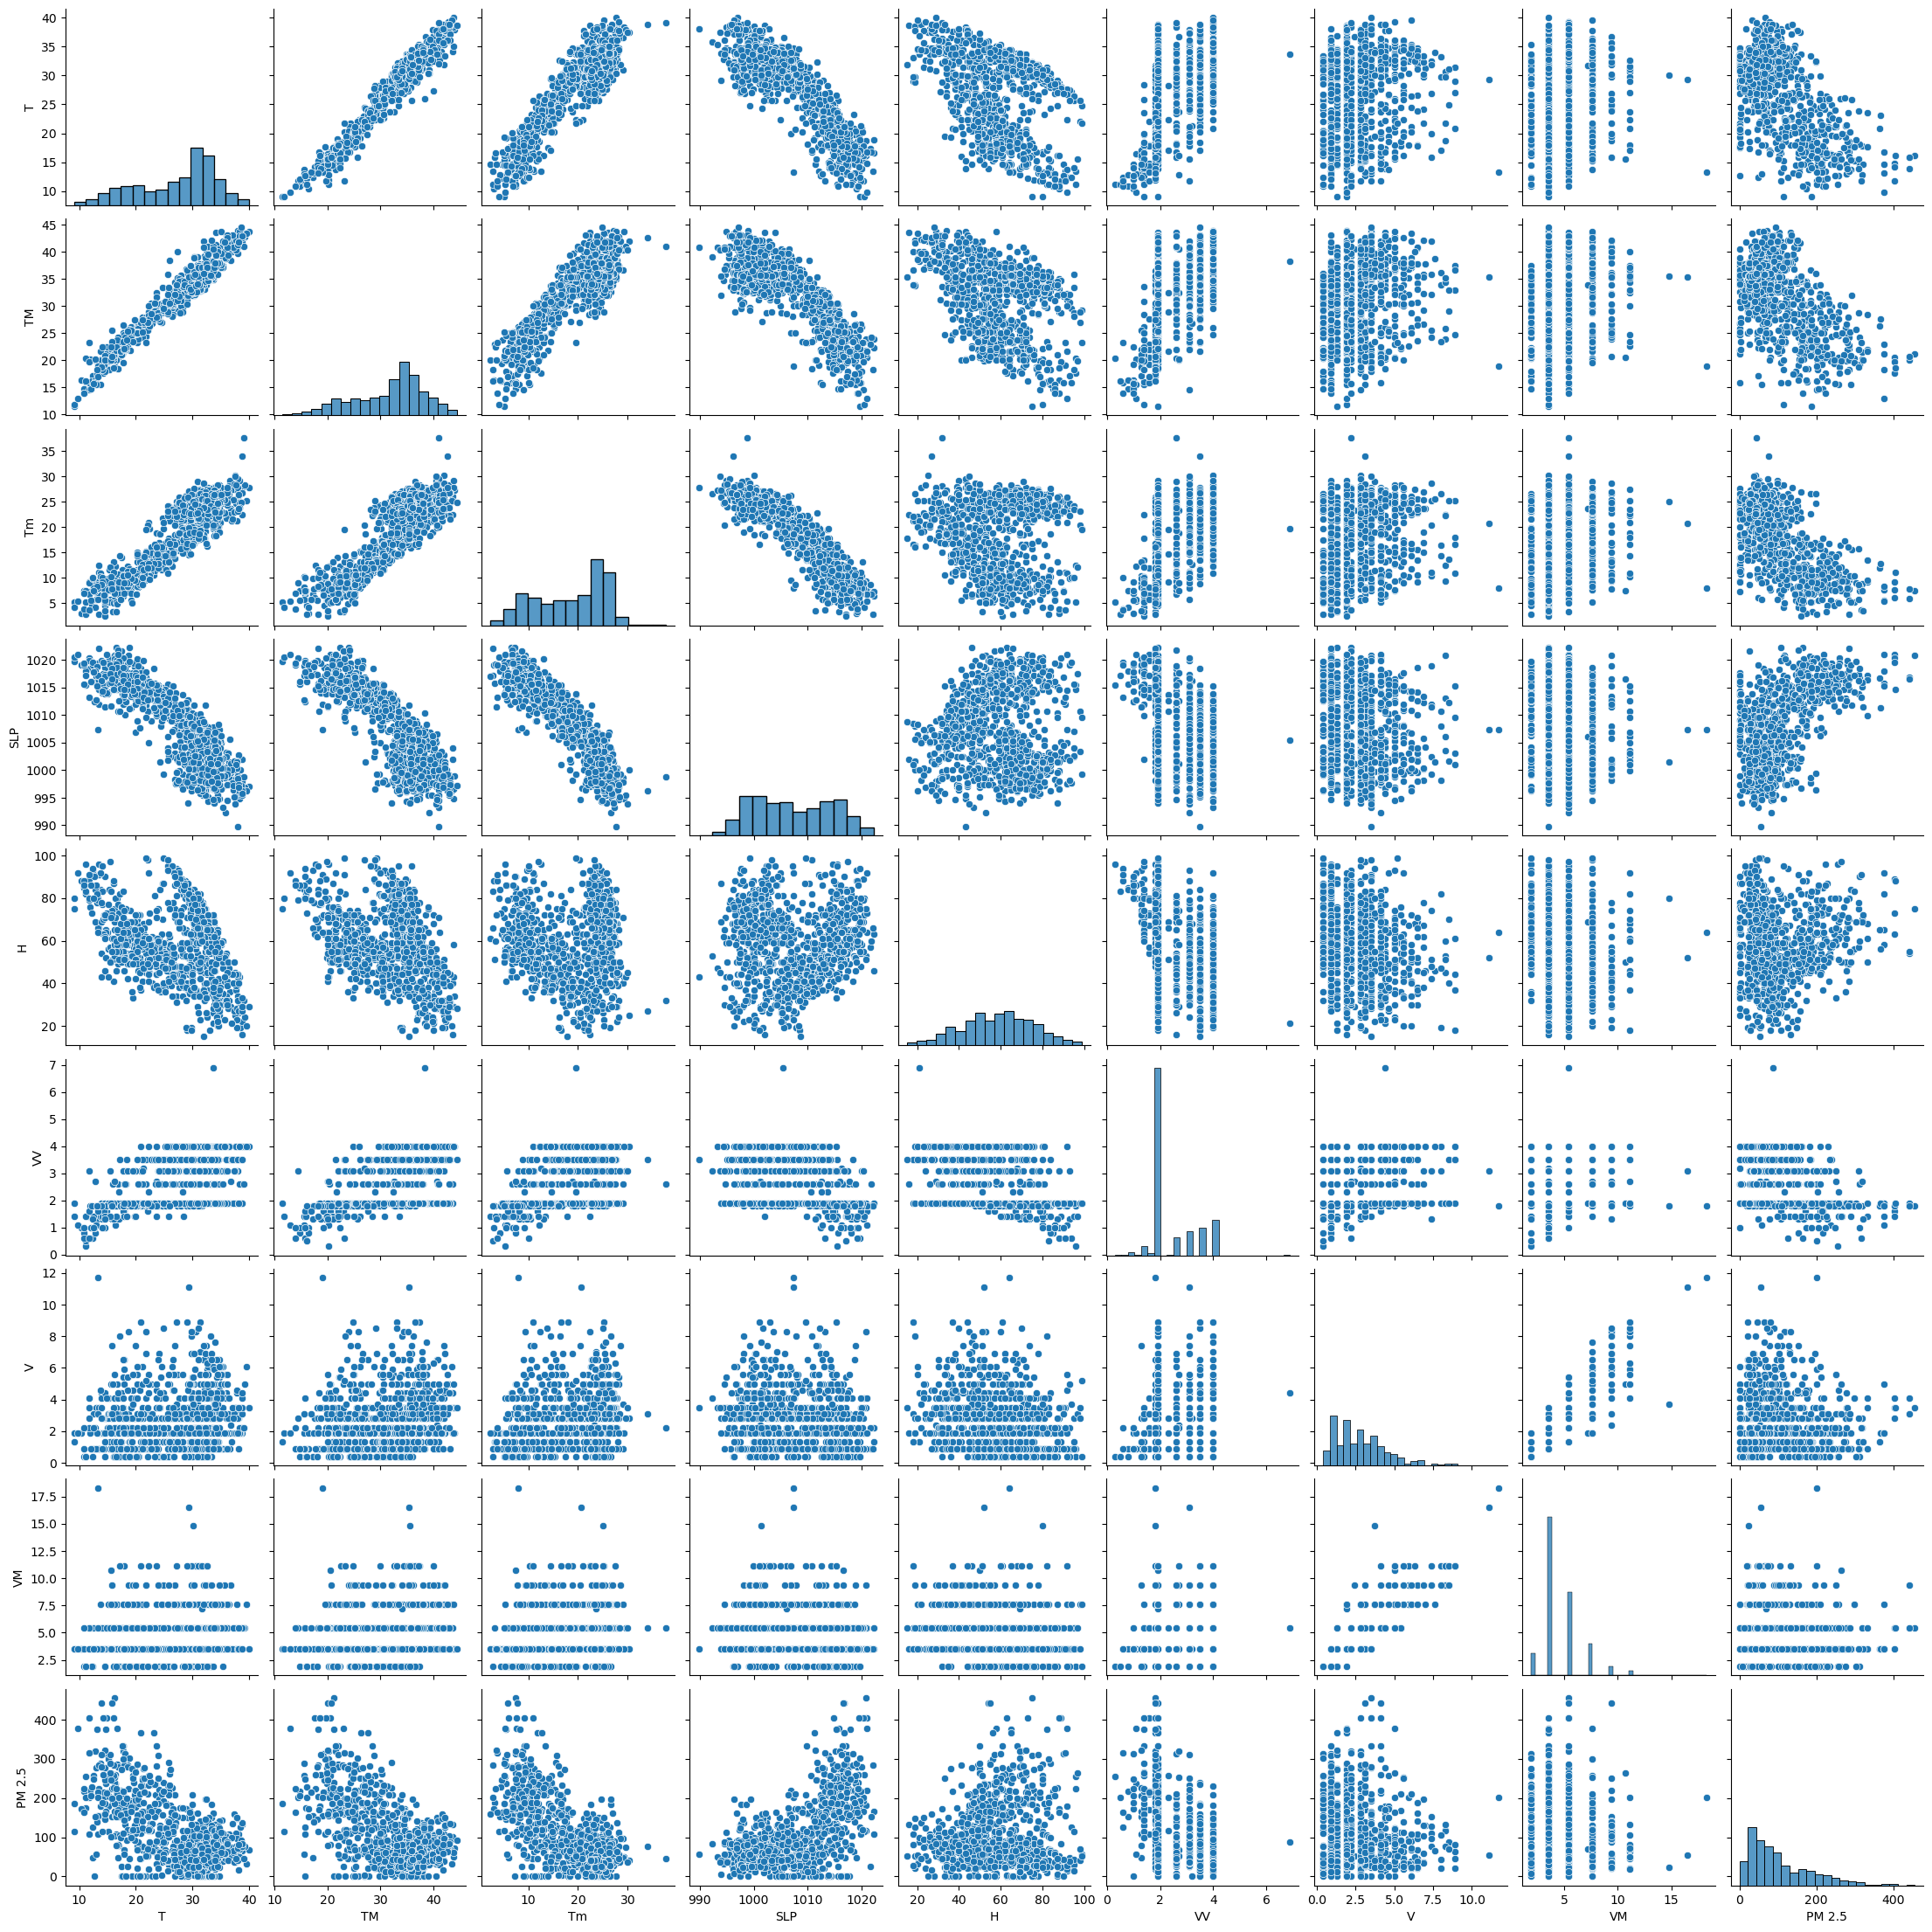

In [14]:
sns.pairplot(data)

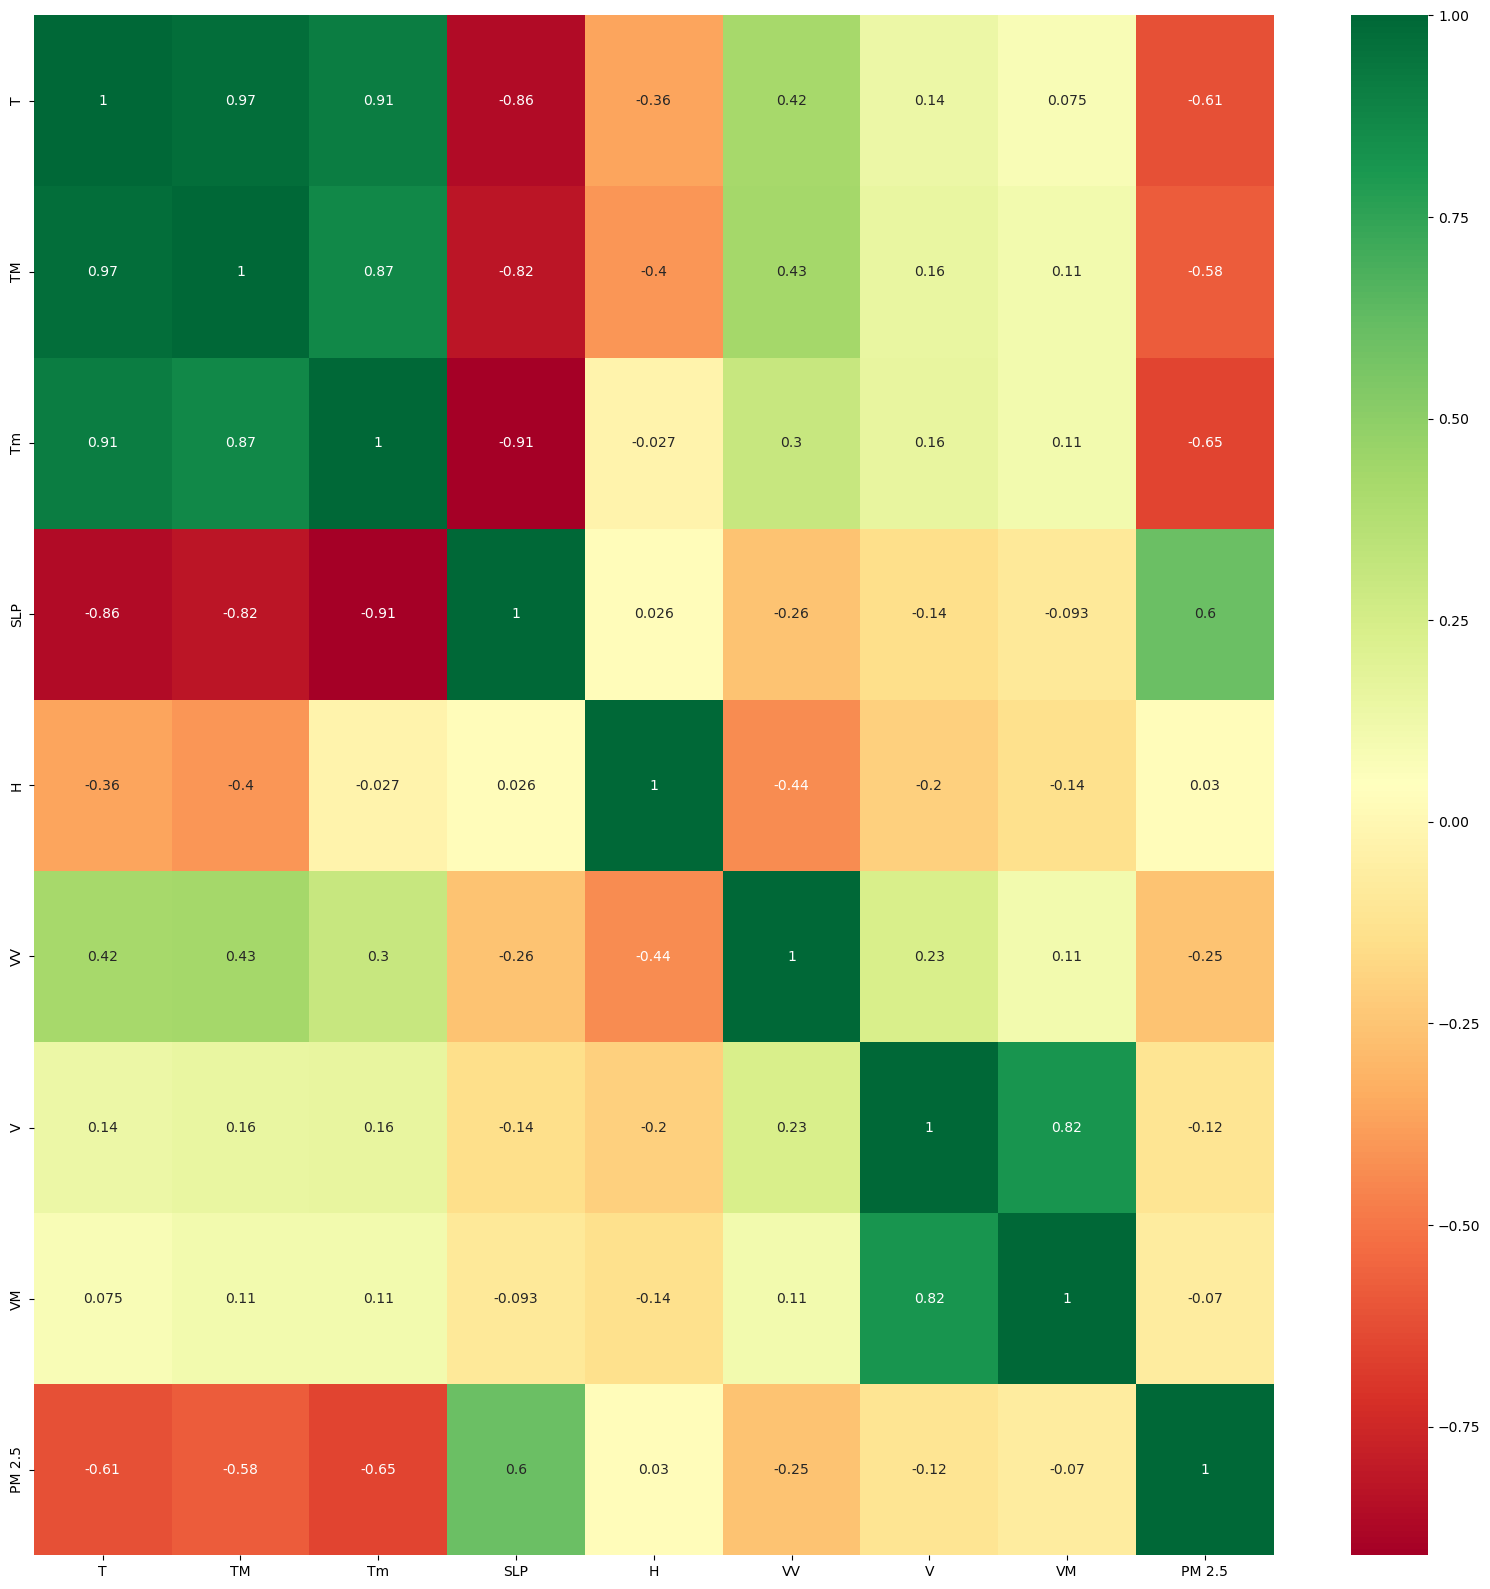

In [15]:
import seaborn as sns
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [16]:
data.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,27.188248,31.591453,18.508547,1007.266346,58.450855,2.376389,2.756090,4.648184,104.031571
std,6.944023,6.634542,6.971767,7.197115,17.056112,0.840046,1.738376,2.013255,82.690409
min,9.100000,11.500000,2.400000,989.800000,15.000000,0.300000,0.400000,1.900000,0.000000
25%,21.650000,26.900000,12.175000,1000.950000,47.000000,1.900000,1.300000,3.500000,41.677083
50%,29.600000,33.400000,20.450000,1006.700000,59.000000,1.900000,2.800000,3.500000,77.666667
75%,32.400000,36.000000,24.500000,1013.800000,71.000000,3.100000,3.500000,5.400000,150.218750
max,40.000000,44.500000,37.600000,1022.200000,99.000000,6.900000,11.700000,18.300000,455.583333


In [17]:
# linear Rgression help to make the best fit line 


# Feature Importance

In [18]:
# you can get the feature importance of each feature of your dataset
# feature importance gives you score for each feture of your dataset higher the score higher the importance of feature
#to find this we use the in built class that comes with Tree based Regressor we use extra tree regressor to get the feature importance


In [19]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [20]:
print(model.feature_importances_)

[0.18398915 0.13135729 0.234827   0.1947986  0.09677799 0.05255055
 0.06969126 0.03600815]


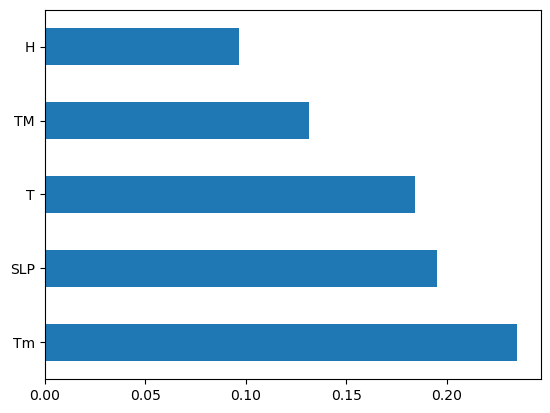

In [21]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

##Linear Regression

<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

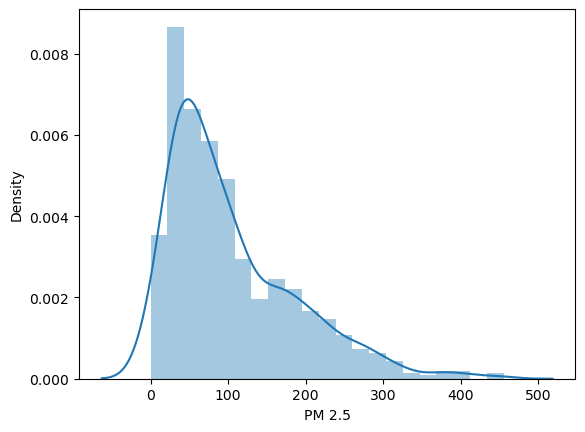

In [22]:
sns.distplot(y)

Train

# Train & test split

In [23]:
from sklearn.model_selection import train_test_split
X_Train,X_Test,y_Train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [24]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_Train,y_Train)

LinearRegression()

In [25]:
# now checking the cofficient of detemination for test and train

In [26]:
print("Cofficient of Determination R^2".format(regressor.score(X_Train,y_Train)))

Cofficient of Determination R^2


In [27]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,x,y,cv=5)

In [28]:
score.mean()

0.4015413309392941

 it is worst for this dataset because Linear Regression make the best fit line and the datset far from the line make error 

# Model Evaluation

In [30]:
coff=pd.DataFrame(regressor.coef_,x.columns,columns=["cofficient"])
coff

,cofficient
T,-4.381421
TM,2.555704
Tm,-5.026106
SLP,0.462886
H,-0.354896
VV,-7.661676
V,-3.653660
VM,2.037278


# Interpreating the cofficient 
 Holding all other features fixed and if we increase 1 unit value of T then there will be 4.38 decrease in AQI PM2.5


In [31]:
pred=regressor.predict(X_Test)

In [32]:
pred

array([ 46.5538939 ,  50.59823429,  59.16537796, 226.23323248,
       113.19298313, 118.98138951,  64.1542577 ,  52.88536023,
       116.50644148,  34.08465448, 142.29561028, 181.38876696,
       170.30651787, 123.76336505, 106.2020149 ,  56.62678349,
       117.38777503,  74.04102997, 172.03338997, 174.97750207,
       174.99607221,  97.28595844, 189.75966006,  86.5596003 ,
        45.94555895,  54.82476369, 132.93429803,  94.15455796,
        56.50458356, 104.59505807,  42.96232233,  60.74644822,
        59.41978307, 127.71112526, 168.50370987, 125.79768504,
       200.20697678,  83.04441629,  64.8353031 , 166.02047238,
        44.23877027,  52.74934228,  50.63776607,  70.72033866,
        65.33080652, 177.1047363 ,  20.89000283,  19.97539324,
        39.81295688,  31.32350787, 196.82880733,  41.11948268,
       150.35181586, 193.14038354, 114.93619192,  67.67641259,
       140.49098731, 202.81169917,  43.56626626, 197.11127491,
        71.07658261, 118.84057179, 165.68583301, 193.77

<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

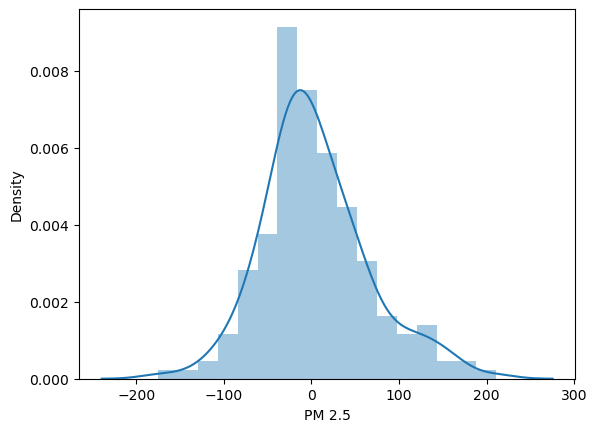

In [33]:
sns.distplot(y_test-pred)

# Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.


In [34]:
from sklearn import metrics


In [35]:
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 45.81338363602053
MSE: 3737.8952390348372
RMSE: 61.138328722944635


# Model Result

According to above calculation and Model Prediction the accuracy is too less so we cant apply the Linear Regression 

In [36]:
import pickle


In [37]:
file=open('Regression.pkl','wb')
pickle.dump(data,file)